In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import acquire_plays_data
import prep_plays
import wrangle_plays_data
import re
plt.rc("figure", figsize=(12, 7))
plt.rc("font", size=14)

Acquire.py Loaded Successfully
Prep.py Loaded Successfully
Wrangle.py Loaded Successfully


In [2]:
df = acquire_plays_data.get_plays_data()

In [3]:
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [4]:
df = prep_plays.prep_plays_data()

In [5]:
df.head().T

,0,1,2,3,4
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
team_by_comp_yds,3,3,3,3,3
defendersInTheBox,7,7,6,6,8
numberOfPassRushers,4,4,4,5,6
QB_under_pressure,0.0,0.0,0.0,1.0,0.0
gameClock,15:00:00,13:10:00,13:05:00,13:01:00,10:59:00
absoluteYardlineNumber,90,49,49,49,11


In [6]:
df.describe()

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,absoluteYardlineNumber,epa,pass_stopped,playResult,...,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
count,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,...,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000,17001.000000
mean,2.590612,1.900594,8.966061,15.628610,6.014352,4.191989,59.922710,0.107399,0.349803,7.392800,...,0.046644,0.000823,0.012529,0.664020,0.141874,0.000176,0.123699,0.035880,0.640668,0.176990
std,1.125498,0.840728,3.977491,9.230681,0.992398,0.878413,23.607128,1.537225,0.476922,10.084464,...,0.210882,0.028685,0.111231,0.472346,0.348931,0.013283,0.329247,0.185997,0.479819,0.381671
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,11.000000,-11.935951,0.000000,-70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,7.000000,7.000000,5.000000,4.000000,40.000000,-0.602603,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,10.000000,15.000000,6.000000,4.000000,60.000000,-0.160139,0.000000,5.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,3.000000,10.000000,24.000000,7.000000,5.000000,80.000000,1.033558,1.000000,11.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,4.000000,41.000000,32.000000,11.000000,9.000000,109.000000,8.629316,1.000000,97.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17001 entries, 0 to 17006
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   playDescription         17001 non-null  object 
 1   quarter                 17001 non-null  int64  
 2   down                    17001 non-null  int64  
 3   yardsToGo               17001 non-null  int64  
 4   team_by_comp_yds        17001 non-null  int64  
 5   defendersInTheBox       17001 non-null  float64
 6   numberOfPassRushers     17001 non-null  float64
 7   QB_under_pressure       17001 non-null  object 
 8   gameClock               17001 non-null  object 
 9   absoluteYardlineNumber  17001 non-null  float64
 10  epa                     17001 non-null  float64
 11  pass_stopped            17001 non-null  int64  
 12  playResult              17001 non-null  int64  
 13  RB                      17001 non-null  object 
 14  TE                      17001 non-null

In [8]:
# Nickle - 5 defensive backs Dime 6 defensive backs. 
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(df)

In [9]:
X_train.T

,12331,9633,13947,15562,5458,9060,7240,11494,3899,4911,...,13238,4813,15921,5634,7271,14217,15210,7739,14947,641
quarter,4,4,4,3,4,3,2,3,4,4,...,1,3,1,2,1,4,1,1,4,4
down,1,3,1,2,1,3,3,1,1,1,...,2,2,3,1,2,1,2,3,2,2
yardsToGo,15,9,10,10,10,7,10,10,10,10,...,9,8,4,10,17,10,10,8,1,10
team_by_comp_yds,5,31,14,24,10,7,17,17,30,21,...,9,20,28,24,10,20,31,1,15,32
defendersInTheBox,5,6,5,5,6,6,5,7,6,6,...,7,6,6,6,4,7,6,5,6,6
numberOfPassRushers,4,4,4,4,4,4,4,5,6,4,...,4,5,4,5,4,5,4,5,5,4
QB_under_pressure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absoluteYardlineNumber,65,63,75,31,50,106,20,94,70,76,...,27,71,65,66,59,40,70,74,39,50
epa,-0.434026,-1.64332,-0.22306,-0.755375,-0.507168,-1.03667,3.39622,-0.547175,0.113275,-0.0955019,...,0.906769,-0.707462,1.92822,0.0986205,-0.382263,-0.251191,0.973164,-1.71468,-0.39161,-0.334711
playResult,0,0,0,-4,0,0,10,0,6,6,...,10,0,8,5,6,3,11,0,0,6


# Exploring the data

Text(0.5, 1.0, 'Nickle Defense and yards gained')

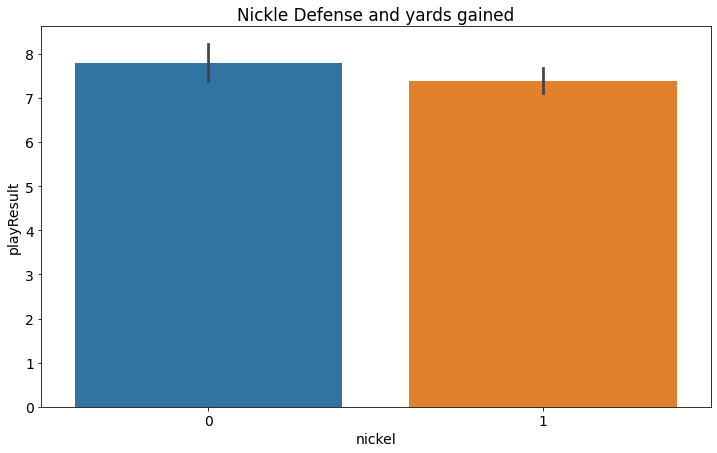

In [10]:
sns.barplot(data=X_train,x='nickel', y='playResult')
plt.title("Nickle Defense and yards gained")

Text(0.5, 1.0, 'Dime Defense Against Pass')

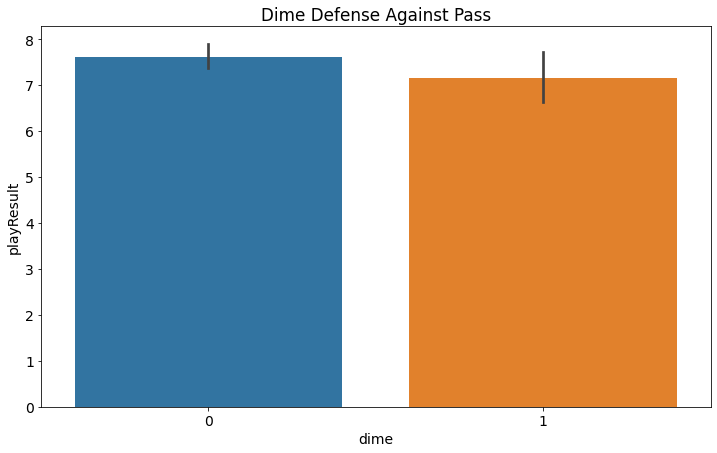

In [11]:
sns.barplot(data=X_train,x='dime', y='playResult')
plt.title("Dime Defense Against Pass")

Text(0.5, 1.0, 'Nickle Defense Against Pass')

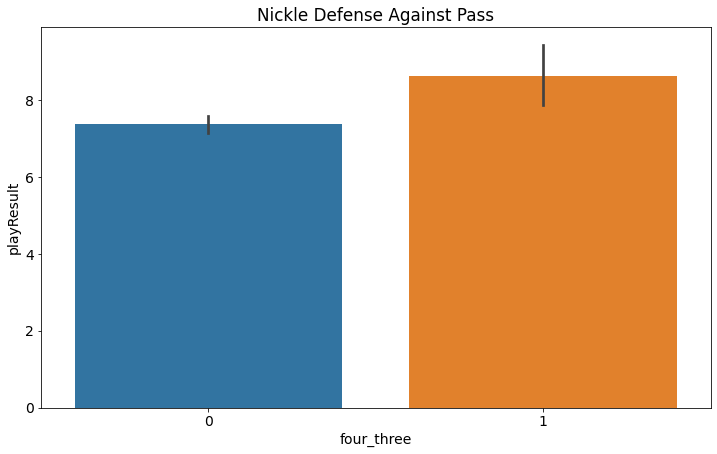

In [12]:
sns.barplot(data=X_train,x='four_three', y='playResult')
plt.title("Nickle Defense Against Pass")

Text(0.5, 1.0, 'Nickle Defense Against Pass')

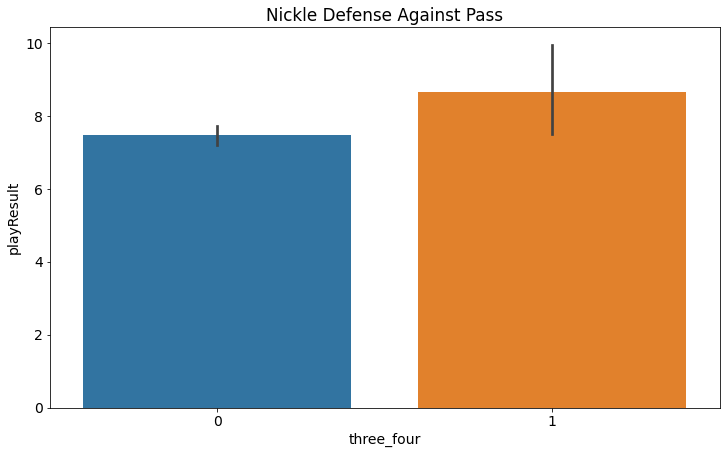

In [13]:
sns.barplot(data=X_train,x='three_four', y='playResult')
plt.title("Nickle Defense Against Pass")

<AxesSubplot:xlabel='playResult', ylabel='Density'>

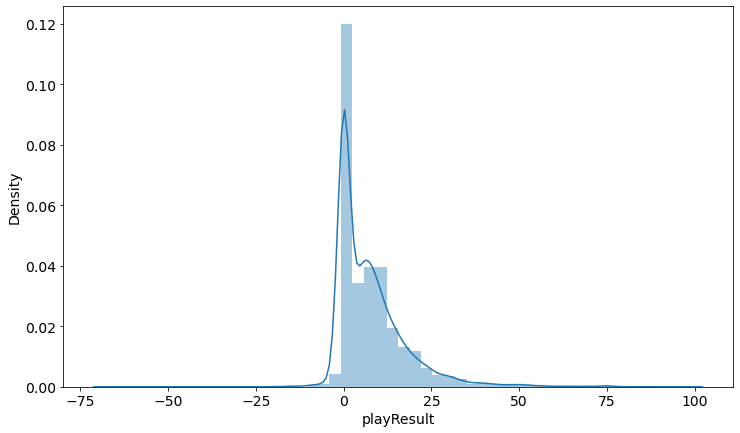

In [14]:
sns.distplot(X_train.playResult)

In [15]:
df1 = pd.read_csv('plays.csv')

In [16]:
df1.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,ATL,ATL,ATL,ATL,ATL
playType,play_type_pass,play_type_pass,play_type_pass,play_type_pass,play_type_pass
yardlineSide,ATL,PHI,PHI,PHI,PHI
yardlineNumber,20,39,39,39,1


In [17]:
df1.personnelD.value_counts()

4 DL, 2 LB, 5 DB                    6652
3 DL, 3 LB, 5 DB                    3103
4 DL, 3 LB, 4 DB                    2407
2 DL, 4 LB, 5 DB                    2109
4 DL, 1 LB, 6 DB                    1104
3 DL, 2 LB, 6 DB                    1047
2 DL, 3 LB, 6 DB                     917
3 DL, 4 LB, 4 DB                     743
1 DL, 4 LB, 6 DB                     311
1 DL, 5 LB, 5 DB                     266
1 DL, 3 LB, 7 DB                     102
5 DL, 2 LB, 4 DB                      93
3 DL, 1 LB, 7 DB                      82
2 DL, 2 LB, 7 DB                      71
0 DL, 4 LB, 7 DB                      32
4 DL, 0 LB, 7 DB                      24
4 DL, 4 LB, 3 DB                      23
0 DL, 5 LB, 6 DB                      17
5 DL, 3 LB, 3 DB                      14
5 DL, 1 LB, 5 DB                      13
6 DL, 4 LB, 1 DB                      12
6 DL, 3 LB, 2 DB                      12
0 DL, 6 LB, 5 DB                       6
4 DL, 5 LB, 2 DB                       4
2 DL, 3 LB, 5 DB

<AxesSubplot:xlabel='possessionTeam', ylabel='offensePlayResult'>

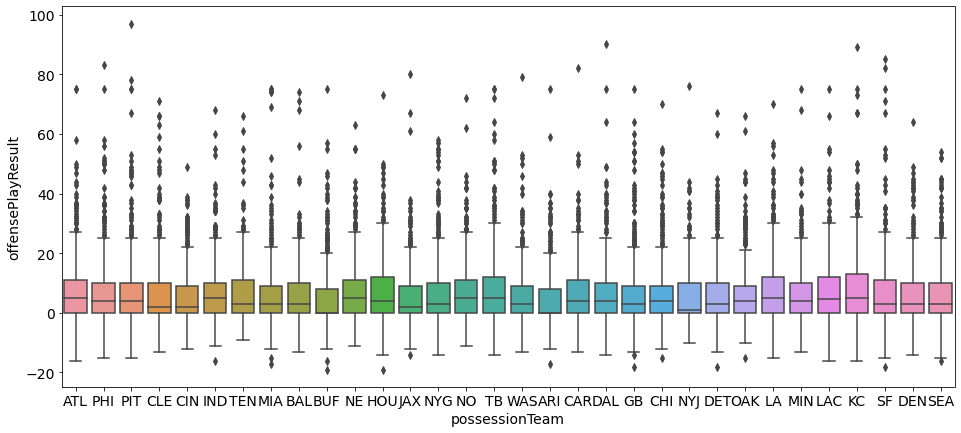

In [18]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='possessionTeam', y= 'offensePlayResult')

<AxesSubplot:xlabel='offensePlayResult', ylabel='offenseFormation'>

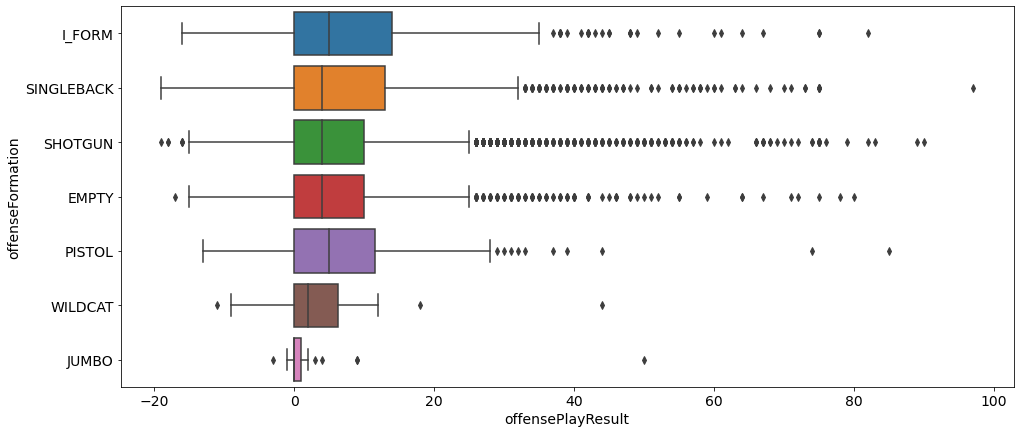

In [19]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'offenseFormation')

<AxesSubplot:xlabel='offensePlayResult', ylabel='offenseFormation'>

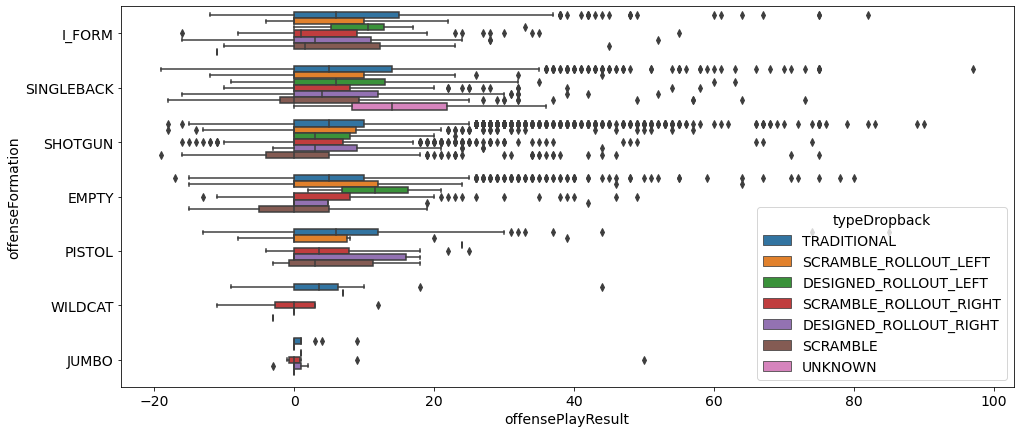

In [20]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'offenseFormation', hue='typeDropback')

<AxesSubplot:xlabel='offensePlayResult', ylabel='personnelD'>

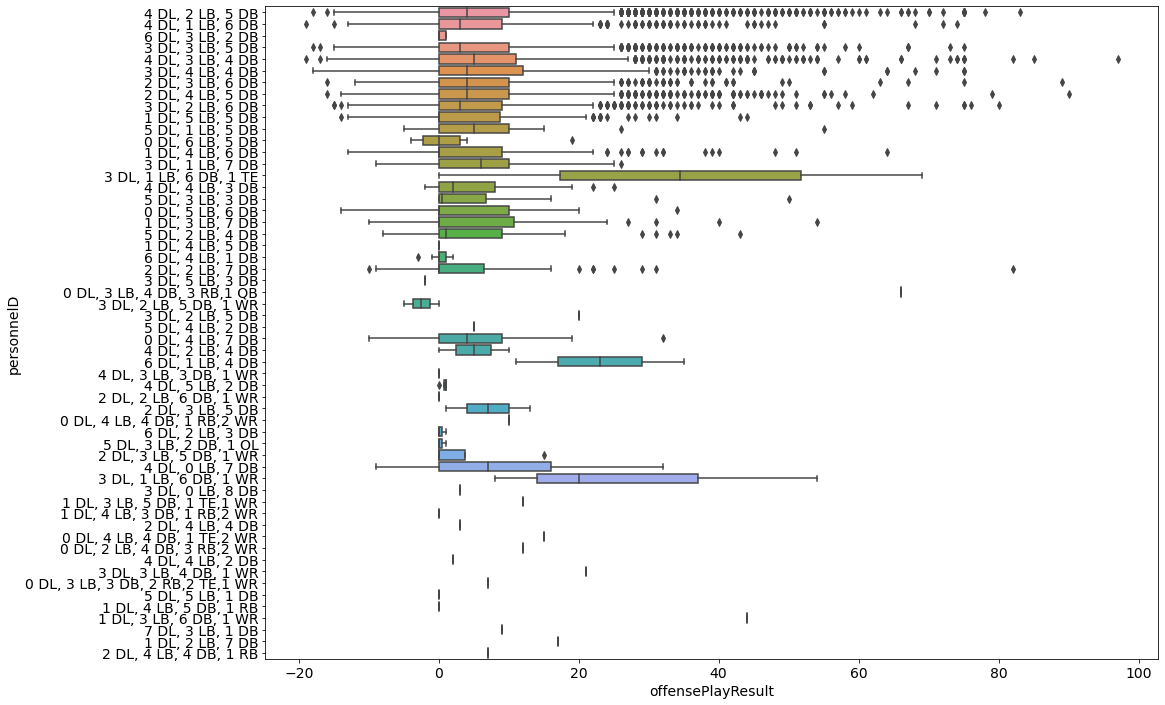

In [21]:
plt.rc("figure", figsize=(16, 12))
sns.boxplot(data=df1, x='offensePlayResult', y= 'personnelD')

<AxesSubplot:xlabel='offensePlayResult', ylabel='personnelO'>

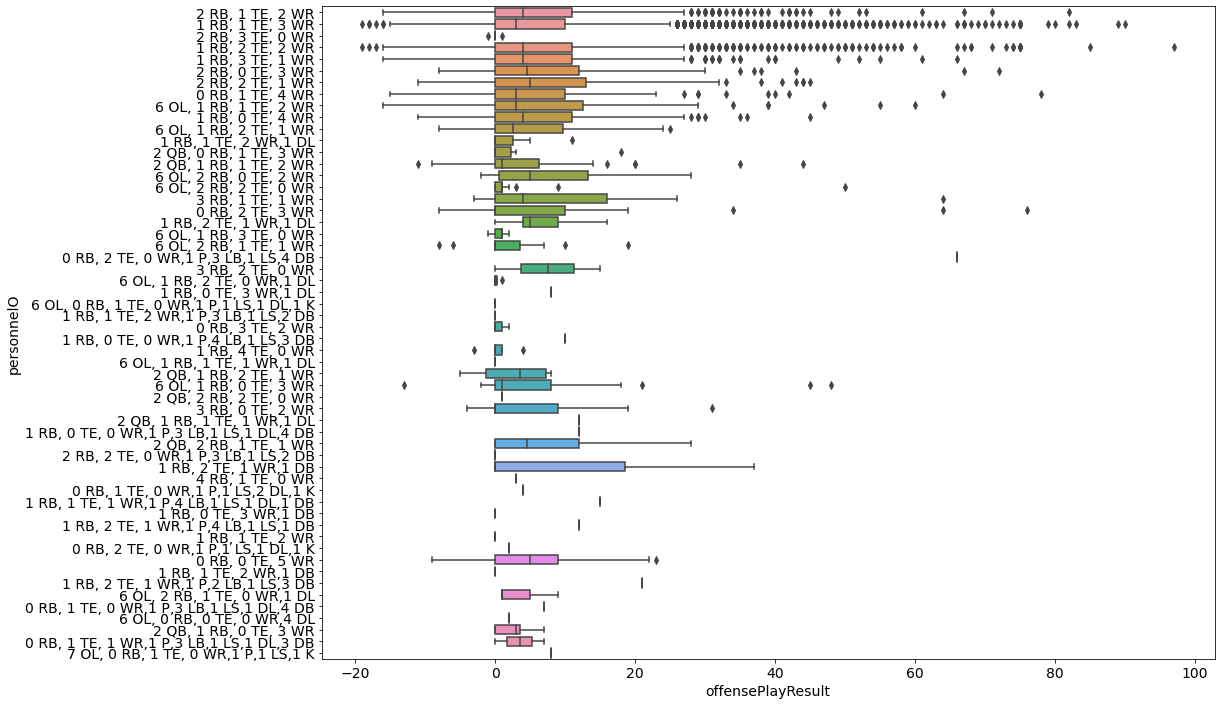

In [22]:
plt.rc("figure", figsize=(16, 12))
sns.boxplot(data=df1, x='offensePlayResult', y= 'personnelO')

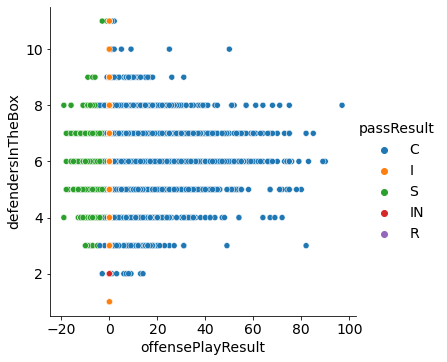

In [23]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='offensePlayResult', y='defendersInTheBox', hue='passResult', data=df1)

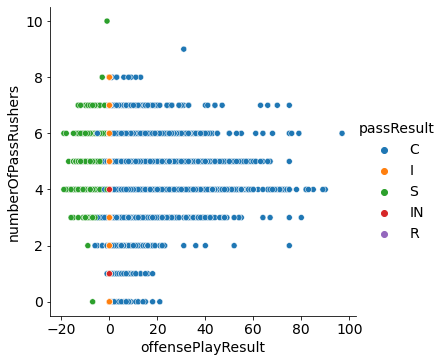

In [24]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='offensePlayResult', y='numberOfPassRushers', hue='passResult', data=df1)

<AxesSubplot:xlabel='yardsToGo', ylabel='passResult'>

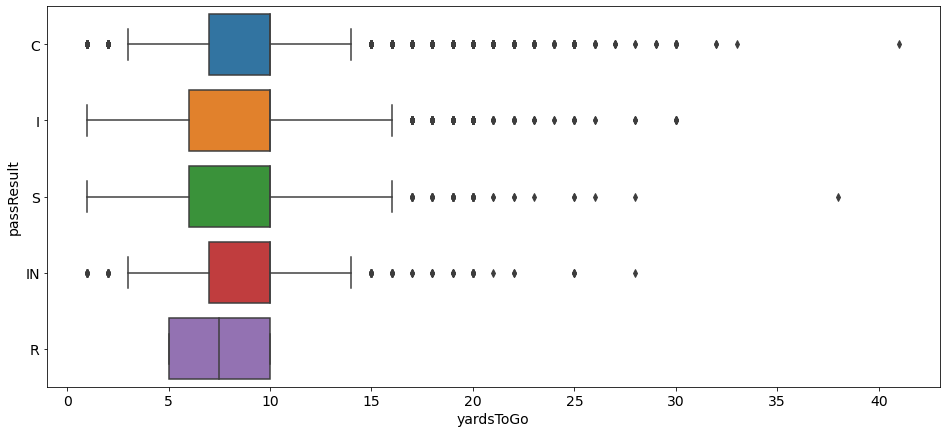

In [25]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='yardsToGo', y= 'passResult')

<AxesSubplot:xlabel='yardsToGo', ylabel='passResult'>

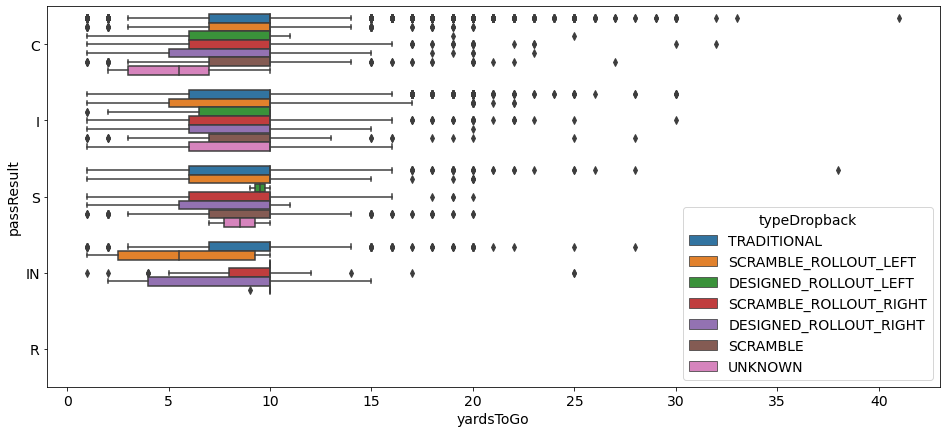

In [26]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='yardsToGo', y= 'passResult', hue='typeDropback')

<AxesSubplot:xlabel='offensePlayResult', ylabel='passResult'>

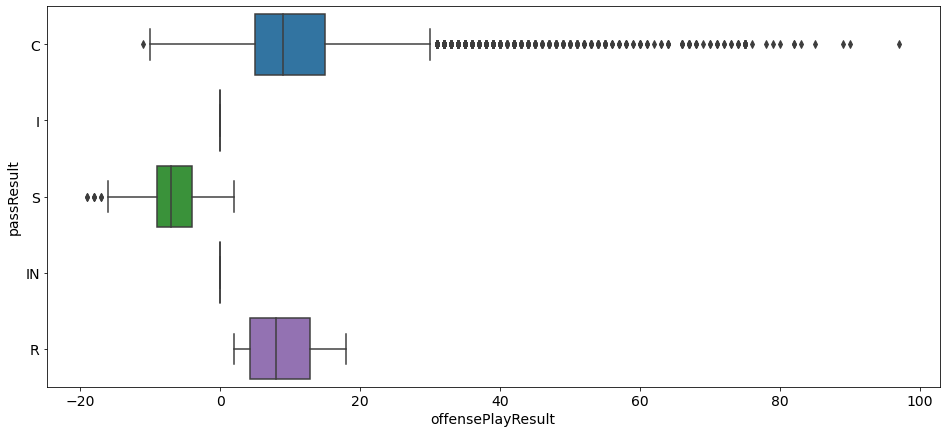

In [27]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'passResult')

Text(0.5, 1.0, 'Average Yards Gained per Quater')

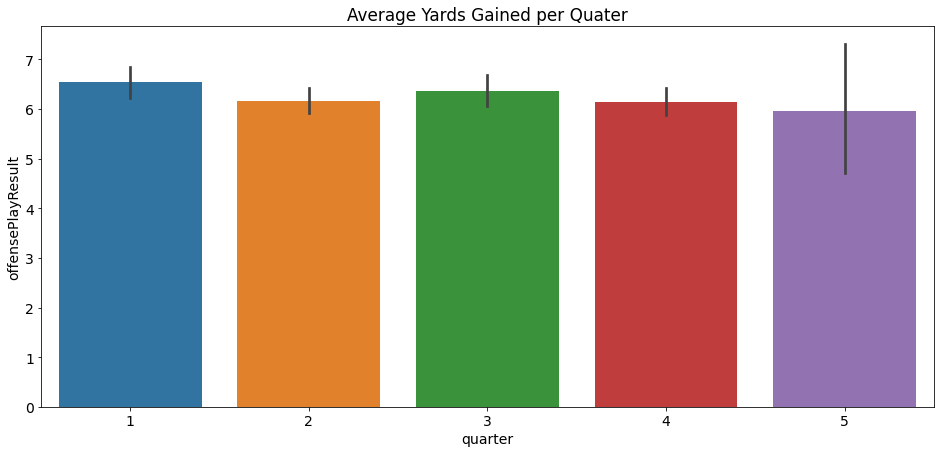

In [28]:
sns.barplot(data=df1,x='quarter', y='offensePlayResult')
plt.title("Average Yards Gained per Quater")

Text(0.5, 1.0, 'Average Yards Gained per Quater')

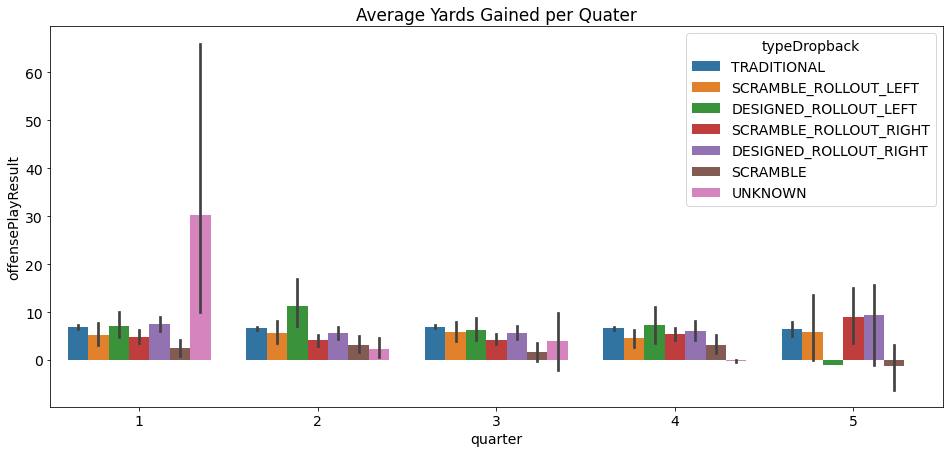

In [29]:
sns.barplot(data=df1,x='quarter', y='offensePlayResult', hue='typeDropback')
plt.title("Average Yards Gained per Quater")

Text(0.5, 1.0, 'Average Yards Gained per Down')

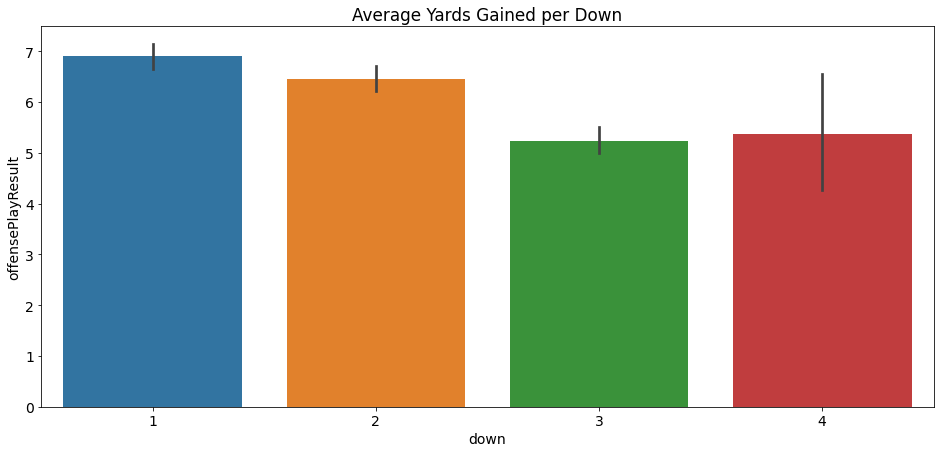

In [30]:
sns.barplot(data=df1,x='down', y='offensePlayResult')
plt.title("Average Yards Gained per Down")

Text(0.5, 1.0, 'Average Yards Gained per Down')

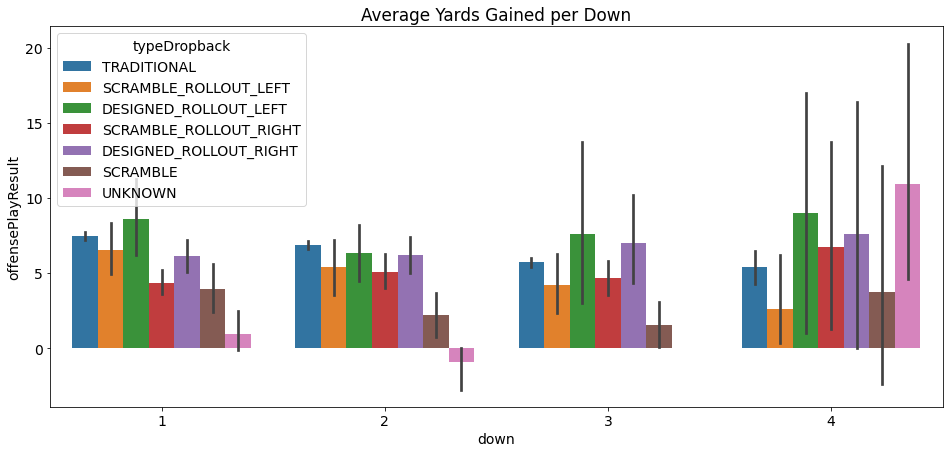

In [31]:
sns.barplot(data=df1,x='down', y='offensePlayResult',  hue='typeDropback')
plt.title("Average Yards Gained per Down")

<AxesSubplot:xlabel='offensePlayResult', ylabel='absoluteYardlineNumber'>

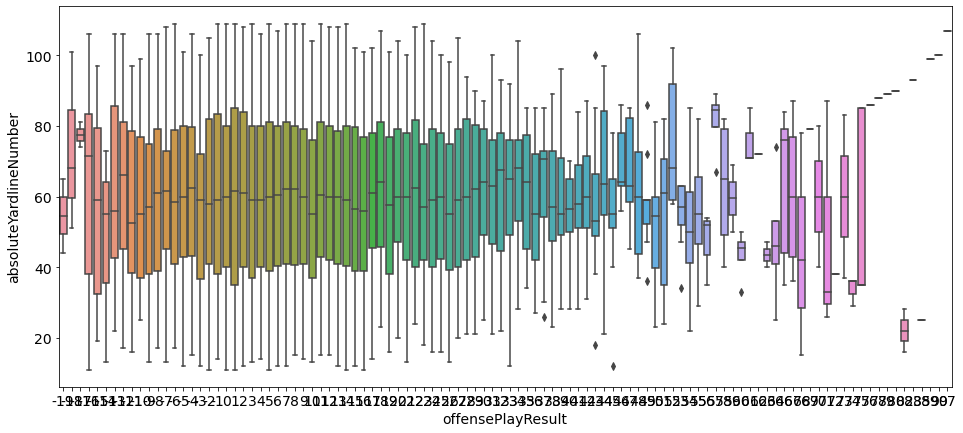

In [32]:
plt.rc("figure", figsize=(16, 7))
sns.boxplot(data=df1, x='offensePlayResult', y= 'absoluteYardlineNumber')

# Using the explore data frame

In [33]:
train, validate, test = prep_plays.explore_plays_data()

In [34]:
train.head().T

,16935,5447,9559,8337,2939
playDescription,(1:55) (Shotgun) B.Gabbert pass short middle t...,(7:31) (Shotgun) E.Manning pass short left to ...,(15:00) (Shotgun) P.Mahomes pass short right t...,(9:24) (Shotgun) M.Trubisky pass incomplete de...,(3:51) (Shotgun) S.Bradford pass incomplete sh...
quarter,3,3,4,2,3
down,3,2,1,3,2
yardsToGo,7,9,10,6,12
team_by_comp_yds,TEN,NYG,KC,CHI,ARI
offenseFormation,SHOTGUN,SHOTGUN,SHOTGUN,SHOTGUN,SHOTGUN
personnelO,"1 RB, 1 TE, 3 WR","1 RB, 1 TE, 3 WR","1 RB, 1 TE, 3 WR","1 RB, 1 TE, 3 WR","1 RB, 1 TE, 3 WR"
defendersInTheBox,5,6,6,6,6
numberOfPassRushers,4,4,3,6,4
personnelD,"2 DL, 4 LB, 5 DB","4 DL, 2 LB, 5 DB","4 DL, 2 LB, 5 DB","3 DL, 3 LB, 5 DB","4 DL, 2 LB, 5 DB"


Text(0.5, 1.0, 'EPA vs Pass Stopped')

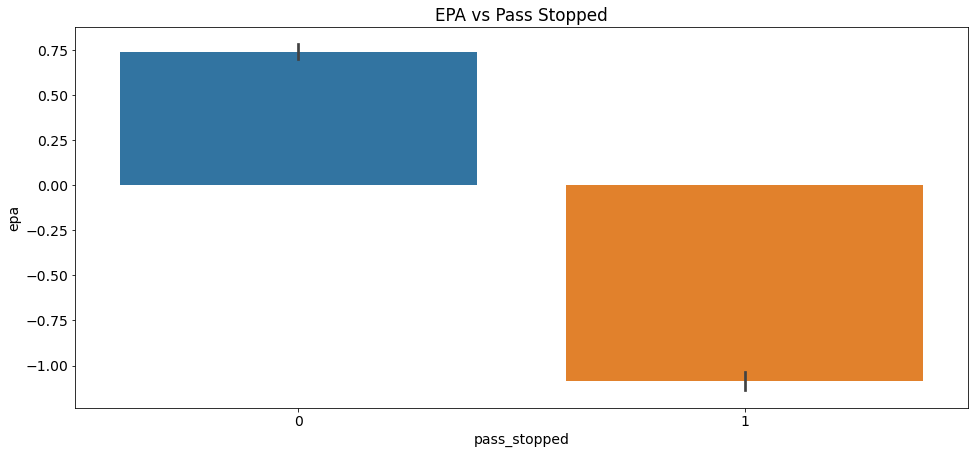

In [35]:
sns.barplot(data=train,x='pass_stopped', y='epa')
plt.title("EPA vs Pass Stopped")

Text(0, 0.5, 'Incompletion Percentage')

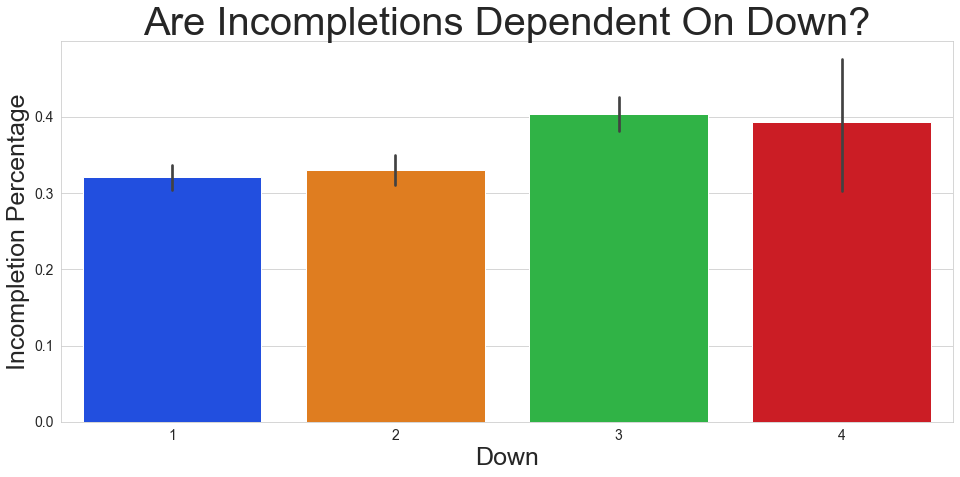

In [65]:
sns.set_style("whitegrid")
b=sns.barplot(data=train,x='down', y='pass_stopped', palette='bright')
b.axes.set_title("Are Incompletions Dependent On Down?", fontsize=40)
b.set_xlabel("Down", fontsize=25)
b.set_ylabel("Incompletion Percentage", fontsize=25)

Text(0, 0.5, 'Incompletion Percentage')

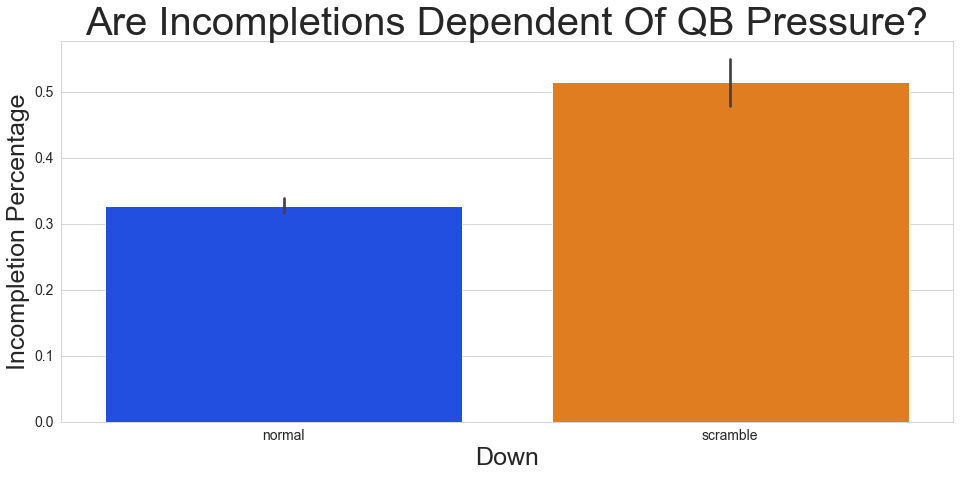

In [64]:
sns.set_style("whitegrid")
b=sns.barplot(data=train,x='QB_under_pressure', y='pass_stopped', palette='bright')
b.axes.set_title("Are Incompletions Dependent Of QB Pressure?", fontsize=40)
b.set_xlabel("Down", fontsize=25)
b.set_ylabel("Incompletion Percentage", fontsize=25)

<AxesSubplot:xlabel='playResult', ylabel='WR'>

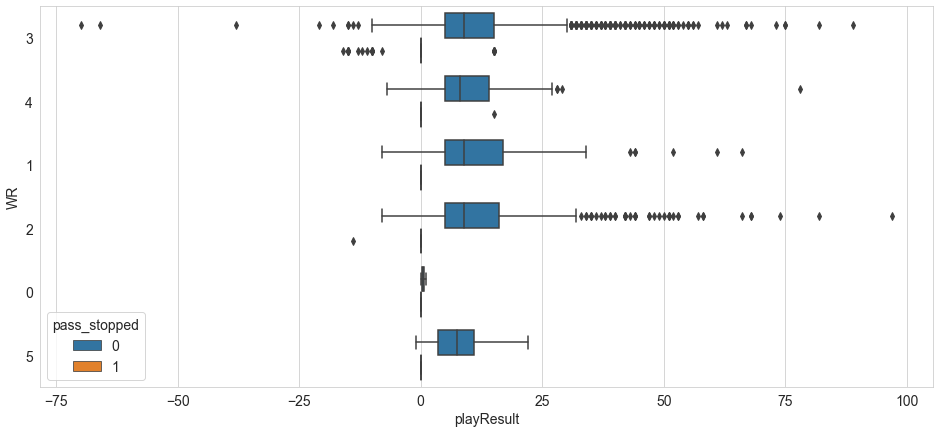

In [38]:
sns.boxplot(data=train, x='playResult', y= 'WR', hue='pass_stopped')

Text(0, 0.5, 'Incompletion')

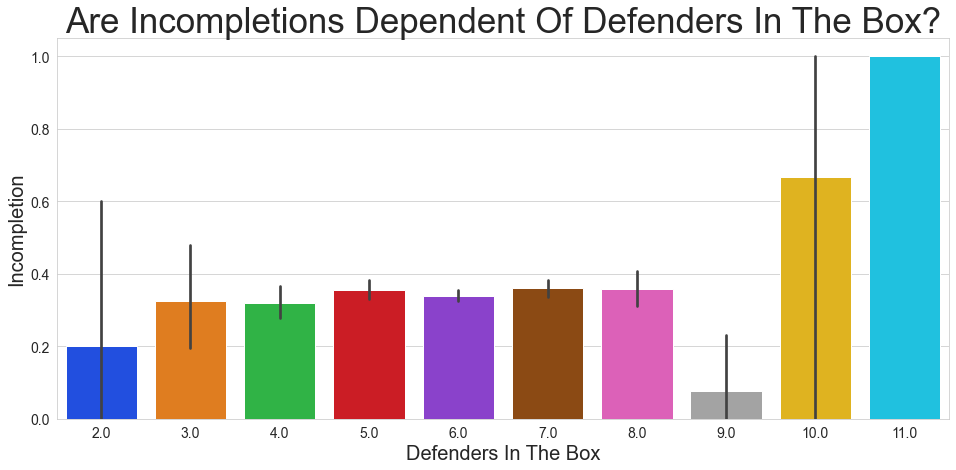

In [69]:
sns.set_style("whitegrid")
b=sns.barplot(data=train,x='defendersInTheBox', y='pass_stopped', palette='bright')
b.axes.set_title("Are Incompletions Dependent Of Defenders In The Box?", fontsize=35)
b.set_xlabel("Defenders In The Box", fontsize=20)
b.set_ylabel("Incompletion", fontsize=20)

Text(0.5, 1.0, 'Passing Completions of WR')

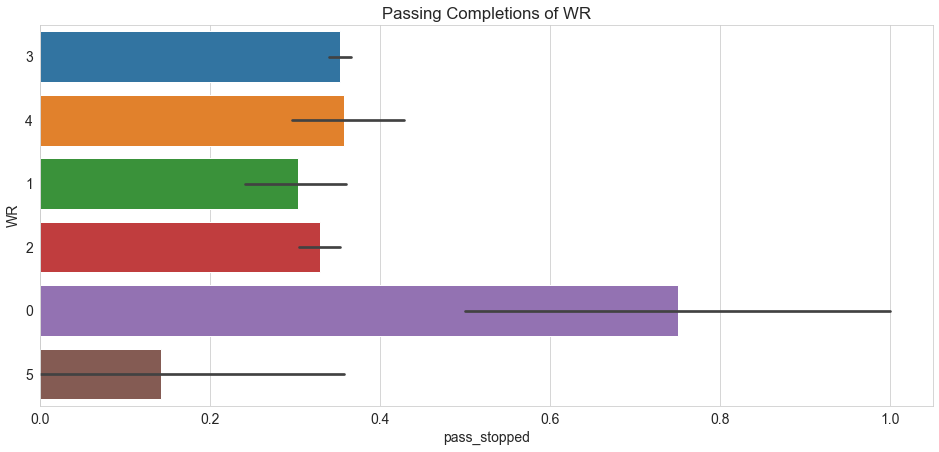

In [39]:
sns.barplot(data=train,x='pass_stopped', y='WR')
plt.title("Passing Completions of WR")

Text(0.5, 1.0, 'Passing Completions of TE')

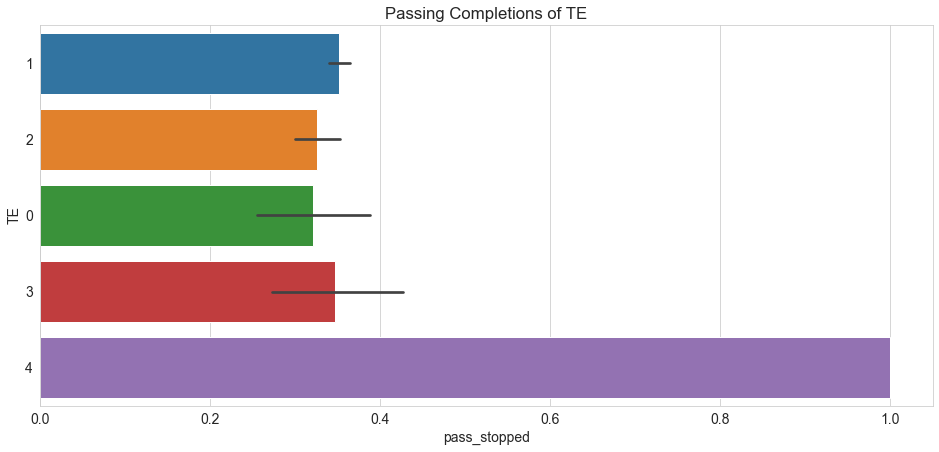

In [40]:
sns.barplot(data=train,x='pass_stopped', y='TE')
plt.title("Passing Completions of TE")

Text(0.5, 1.0, 'Passing Completions of RB')

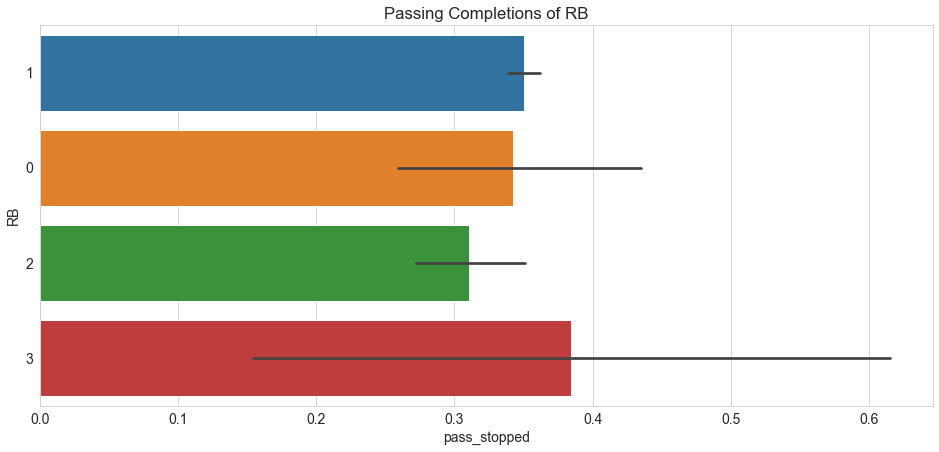

In [41]:
sns.barplot(data=train,x='pass_stopped', y='RB')
plt.title("Passing Completions of RB")

Text(0.5, 1.0, 'DBs Pass Stops')

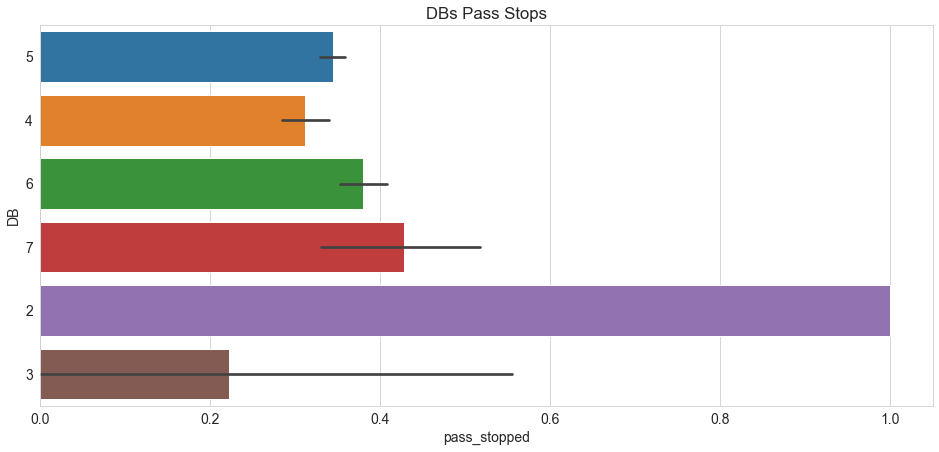

In [42]:
sns.barplot(data=train,x='pass_stopped', y='DB')
plt.title("DBs Pass Stops")

Text(0.5, 1.0, 'DBs Pass Stops')

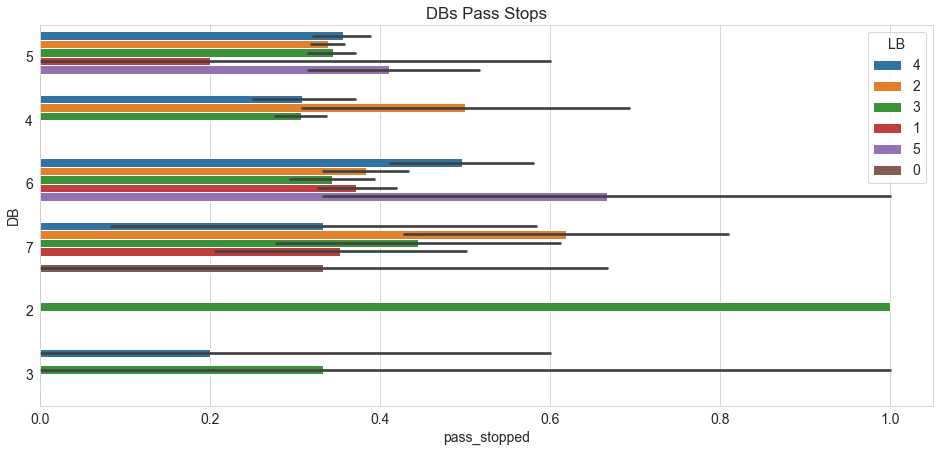

In [43]:
sns.barplot(data=train,x='pass_stopped', y='DB', hue='LB')
plt.title("DBs Pass Stops")

Text(0.5, 1.0, 'DBs Pass Stops')

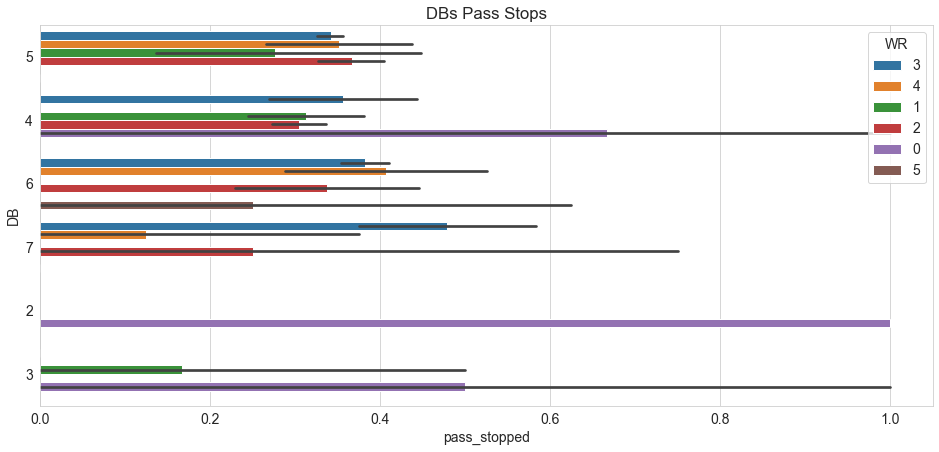

In [44]:
sns.barplot(data=train,x='pass_stopped', y='DB', hue='WR')
plt.title("DBs Pass Stops")

Text(0.5, 1.0, 'LBs Pass Stops')

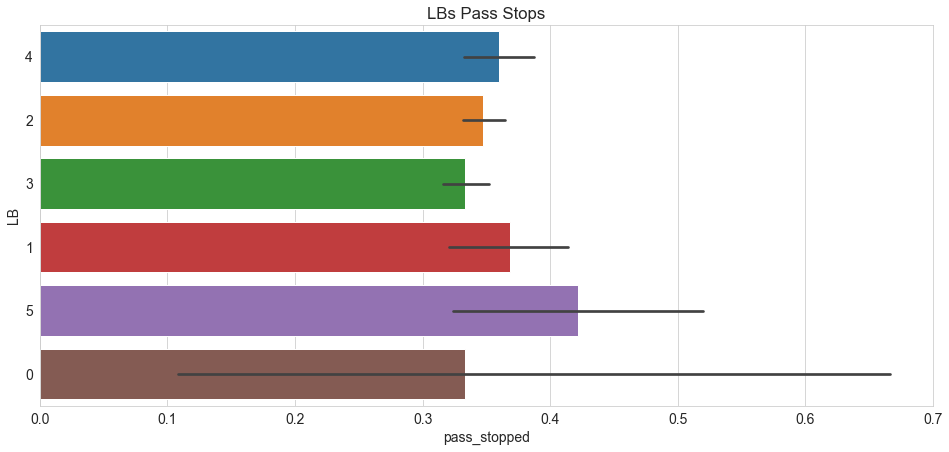

In [45]:
sns.barplot(data=train,x='pass_stopped', y='LB')
plt.title("LBs Pass Stops")

Text(0.5, 1.0, 'DL Pass Stops')

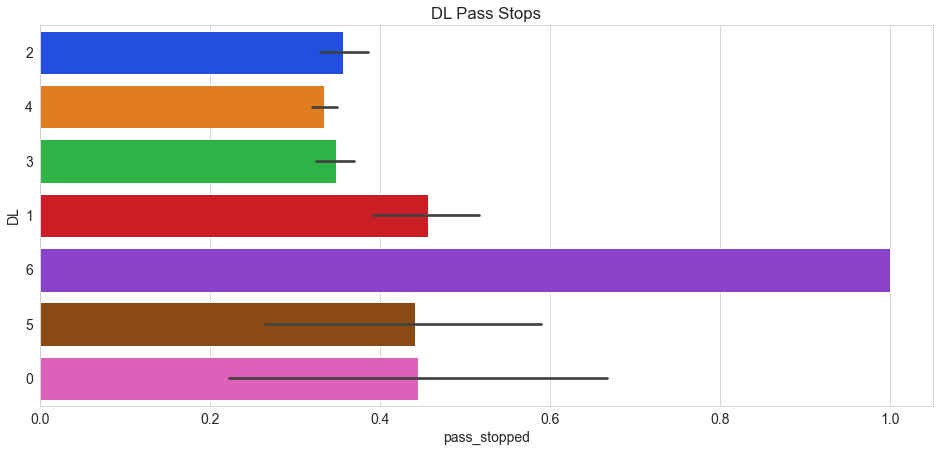

In [71]:
sns.barplot(data=train,x='pass_stopped', y='DL', palette='bright')
plt.title("DL Pass Stops")

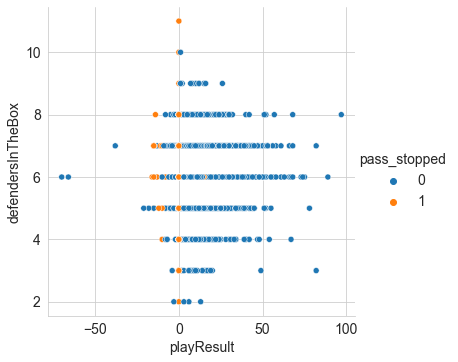

In [47]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='playResult', y='defendersInTheBox', hue='pass_stopped', data=train)

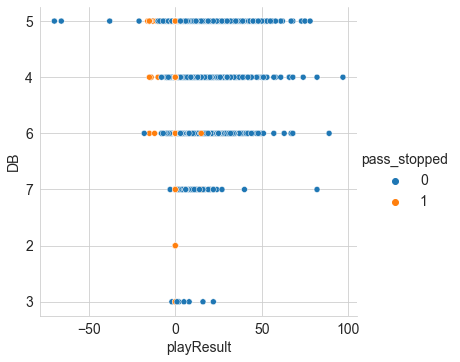

In [48]:
plt.rc("figure", figsize=(16, 7))
sns.relplot(x='playResult', y='DB', hue='pass_stopped', data=train)

In [49]:
import MVP

In [50]:
MVP.MVP()

---------------------------- Train -------------------------------
Accuracy of random forest classifier on training set: 0.89
Training Data Matrix
[[4049  593]
 [ 162 2336]]
Training Data Report
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4642
           1       0.80      0.94      0.86      2498

    accuracy                           0.89      7140
   macro avg       0.88      0.90      0.89      7140
weighted avg       0.90      0.89      0.90      7140

---------------------------- Validate -------------------------------
Accuracy of random forest classifier on validate set: 0.86
Training Data Matrix
[[2586  509]
 [ 148 1517]]
Training Data Report
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3095
           1       0.75      0.91      0.82      1665

    accuracy                           0.86      4760
   macro avg       0.85      0.87      0.85      4760
weighted

(<function MVP.MVP()>,
                      importance
 epa                    0.855928
 yardsToGo              0.053956
 numberOfPassRushers    0.022476
 quarter                0.016584
 defendersInTheBox      0.015104
 QB_under_pressure      0.013480
 DL                     0.012036
 DB                     0.008220
 four_three             0.002215)

<AxesSubplot:xlabel='epa', ylabel='Density'>

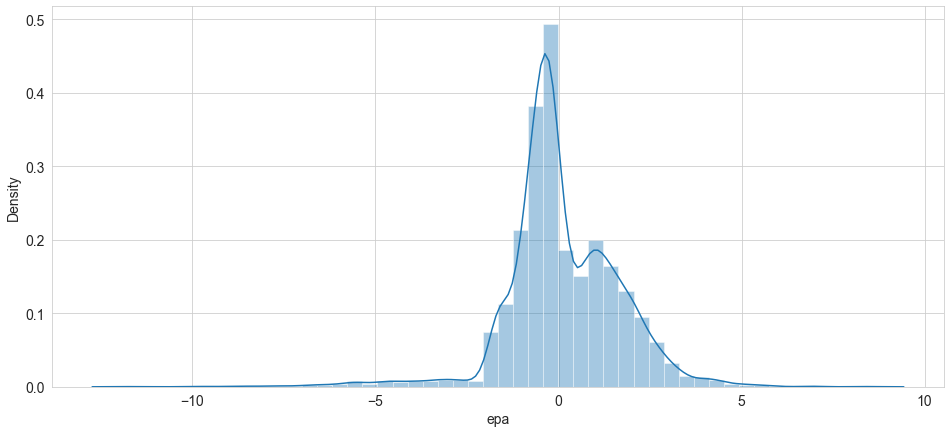

In [51]:
sns.distplot(train.epa)

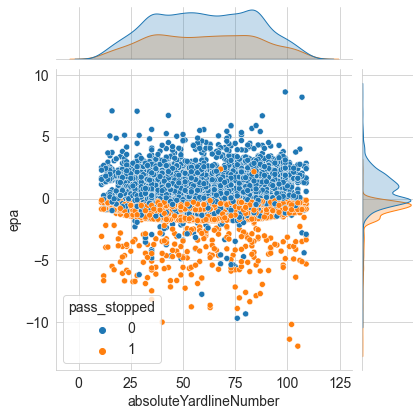

In [52]:
sns.jointplot(data=train, x='absoluteYardlineNumber', y='epa', hue='pass_stopped')
#plt.title("Does Absolute Yard Line Number influence EPA? ")

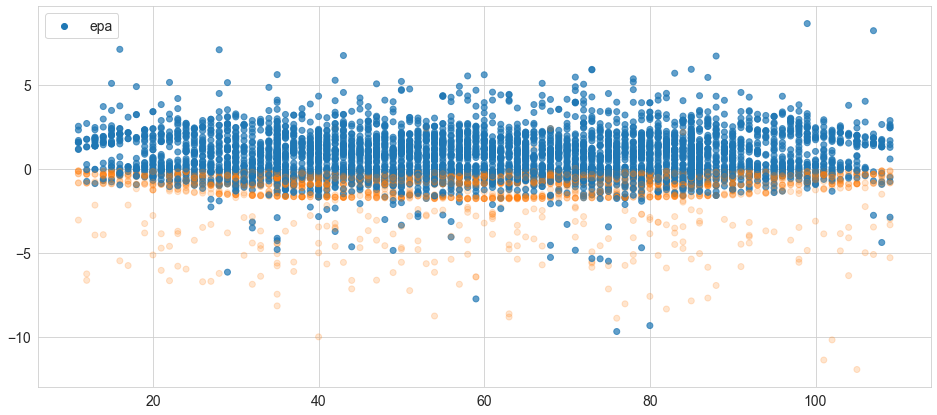

In [53]:
from matplotlib.colors import ListedColormap

colors = [(0.1215, 0.4667, 0.7059, 0.7), 
          (1.0000, 0.4980, 0.0550, 0.2)]
cmap = ListedColormap(colors)
plt.scatter(x='absoluteYardlineNumber', y="epa", c="pass_stopped", data=train, cmap=cmap)
#hl = [(plt.Line2D([],[], color=cmap(i), ls="", marker="o"), i) 
      #for i in np.unique(df["hue"].values)]
plt.legend()
plt.show()

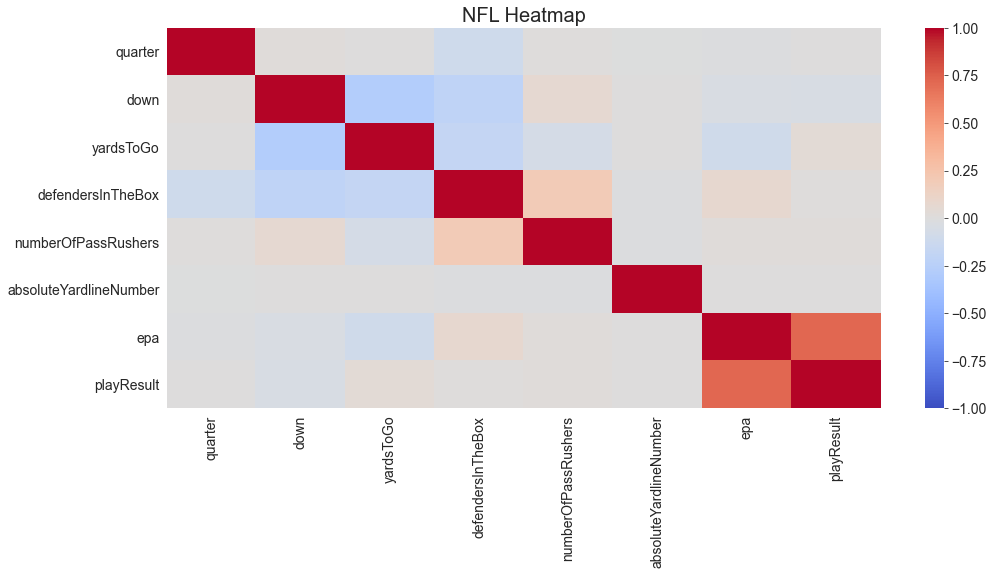

In [54]:
sns.heatmap(train.corr(),
            vmin = -1, 
            cmap='coolwarm',
           annot=False).set_title("NFL Heatmap", fontsize=20);

In [55]:
train.corr()

,quarter,down,yardsToGo,defendersInTheBox,numberOfPassRushers,absoluteYardlineNumber,epa,playResult
quarter,1.000000,0.020509,0.003702,-0.105845,0.010498,-0.004623,-0.010475,0.000724
down,0.020509,1.000000,-0.274673,-0.206182,0.066855,0.007363,-0.032937,-0.046445
yardsToGo,0.003702,-0.274673,1.000000,-0.175992,-0.066309,0.006230,-0.099634,0.041008
defendersInTheBox,-0.105845,-0.206182,-0.175992,1.000000,0.202765,-0.011338,0.071281,0.014165
numberOfPassRushers,0.010498,0.066855,-0.066309,0.202765,1.000000,-0.012577,0.018097,0.019503
absoluteYardlineNumber,-0.004623,0.007363,0.006230,-0.011338,-0.012577,1.000000,0.005190,0.002714
epa,-0.010475,-0.032937,-0.099634,0.071281,0.018097,0.005190,1.000000,0.719906
playResult,0.000724,-0.046445,0.041008,0.014165,0.019503,0.002714,0.719906,1.000000


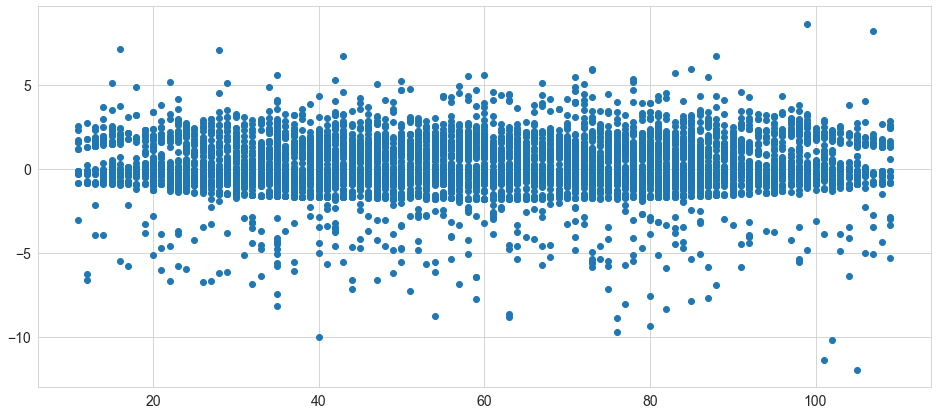

In [56]:
plt.scatter(x=train.absoluteYardlineNumber, y=train.epa)

<AxesSubplot:xlabel='pass_stopped', ylabel='team_by_comp_yds'>

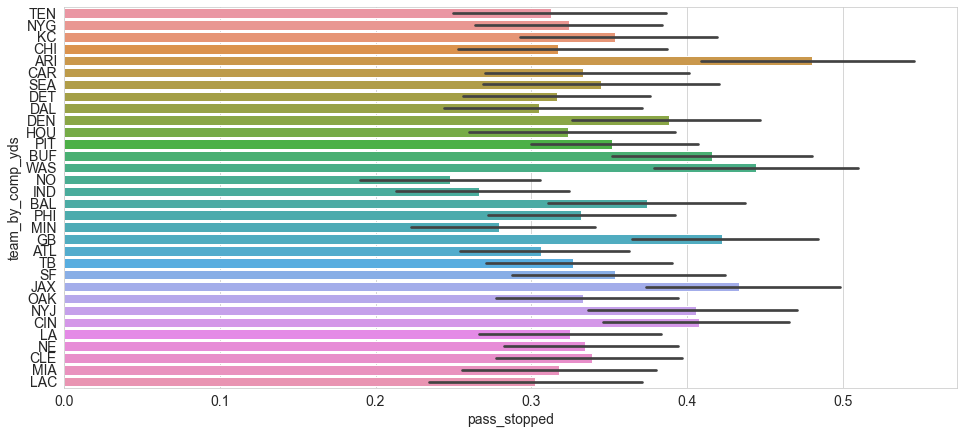

In [57]:
sns.barplot(data=train, x='pass_stopped', y= 'team_by_comp_yds')

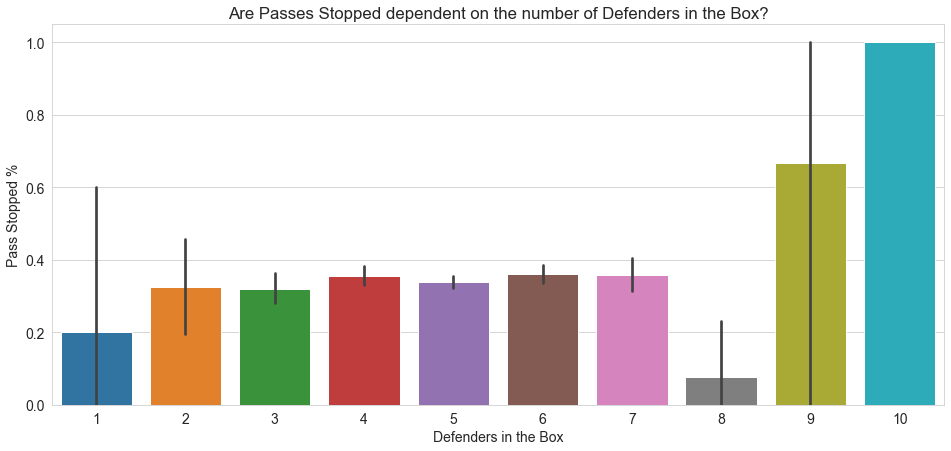

In [58]:
sns.barplot(data=train,x='defendersInTheBox', y='pass_stopped')
plt.xlabel('Defenders in the Box')
plt.ylabel('Pass Stopped %')
plt.xticks([0,1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9,10])
plt.title("Are Passes Stopped dependent on the number of Defenders in the Box?")
plt.show()